В данном практическом задании предлагается решить задачу бинарной классификации с помощью 2-х методов:


*   логистической регрессии;
*   метода k ближайших соседей.

В ходе решения разделите выборку на обучающую и проверочную.

Постройте распределение выборки по классам в виде графиков.

Для каждого классификатора расчитайте:
* долю верных ответов
* матрицу ошибок
* точность, полноту и F-меру

Постройте следующие графики:
* PR кривые для 2-х алгоритмов на одном графике;
* ROC кривые для 2-х алгоритмов на одном графике.

В легенде графиков отразите:
* Average Precision для PR кривой
* ROC-AUC для ROC кривой.

В конце сделайте выводы об предлагаемом алгоритме и порогах его работы.


Ниже сгенерирован набор данных для задачи бинарной классификации

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_repeated = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    weights = (0.15, 0.85),
    class_sep = 6.0,
    hypercube = False,
    random_state = 2,
)

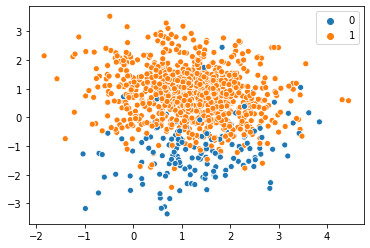

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
reg_model = logreg.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_model = knn.predict(X_test)


Для логистической регрессии:
Доля верных ответов =  0.935
Точность =  0.949438202247191
Полнота =  0.976878612716763
F-мера =  0.9629629629629629
Матрица ошибок :


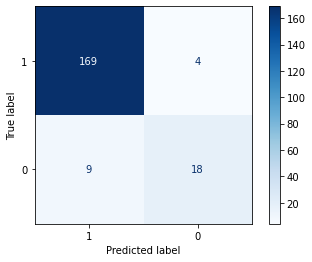

In [4]:
print("Для логистической регрессии:")
print("Доля верных ответов = ",accuracy_score(y_test, reg_model))
print("Точность = ",precision_score(y_test,reg_model))
print("Полнота = ",recall_score(y_test,reg_model))
print("F-мера = ",f1_score(y_test, reg_model))
print("Матрица ошибок :")
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, labels=[1, 0]);


Для метода ближайших соседей:
Доля верных ответов =  0.915
Точность =  0.9382022471910112
Полнота =  0.9653179190751445
F-мера =  0.9515669515669515
Матрица ошибок :


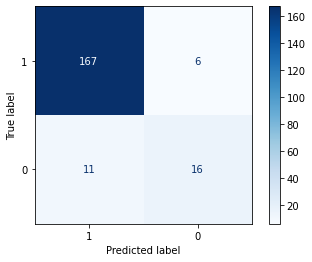

In [5]:
print("Для метода ближайших соседей:")
print("Доля верных ответов = ",accuracy_score(y_test, knn_model))
print("Точность = ",precision_score(y_test,knn_model))
print("Полнота = ",recall_score(y_test,knn_model))
print("F-мера = ",f1_score(y_test, knn_model))
print("Матрица ошибок :")
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, labels=[1, 0]);

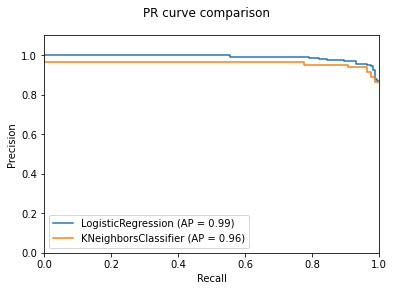

In [6]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

reg_pr =plot_precision_recall_curve(logreg, X_test, y_test)
knn_pr =plot_precision_recall_curve(knn, X_test, y_test, ax=reg_pr.ax_)
knn_pr.ax_.set_ylim((0, 1.1))
knn_pr.ax_.set_xlim((0, 1))
knn_pr.figure_.suptitle("PR curve comparison")
plt.show()


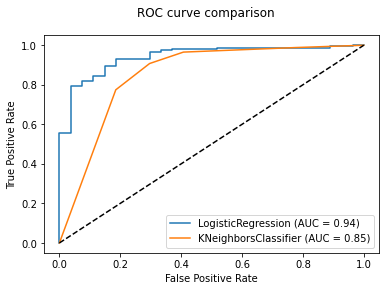

In [7]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

reg_disp = plot_roc_curve(logreg, X_test, y_test)
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=reg_disp.ax_)
knn_disp.ax_.plot([0, 1], [0, 1], 'k--');
knn_disp.figure_.suptitle("ROC curve comparison")

plt.show()
